In [22]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def ebfe_fit(Zs, beta, alpha, b_prime):
    Z1, Z2 = Zs.T
    return(-beta/2*(Z1**(7/3)+Z2**(7/3))+2*alpha+2*b_prime*Z1*Z2)

# def ebfe_fit_aprime(Zs, beta, alpha, b_prime, a_prime):
#     Z1, Z2 = Zs.T
#     return(-beta/2*(Z1**(7/3)+Z2**(7/3))+2*alpha+2*b_prime*Z1*Z2+a_prime*(Z1 + Z2))

# # def ebfe_fit_gamma(Zs, beta, alpha, gamma, b_prime):
# def ebfe_fit_gamma(Zs, beta, alpha, gamma, b_prime):
#     Z1, Z2 = Zs.T
#     return(-beta/2*(np.power(Z1, gamma)+np.power(Z2, gamma))+2*alpha+2*b_prime*Z1*Z2)

# # def ebfe_fit_gamma(Zs, beta, alpha, gamma, b_prime):
# def ebfe_fit_cprime(Zs, beta, alpha, gamma, b_prime, c_prime):
#     Z1, Z2 = Zs.T
#     return(-beta/2*(np.power(Z1, gamma)+np.power(Z2, gamma))+2*alpha+2*b_prime*np.power(Z1, c_prime)*np.power(Z2, c_prime))

def get_r2(predicted, ref):
    return(1 - ((predicted-ref)**2).sum()/((ref-ref.mean())**2).sum())

# def ebfe_fit(Zs, beta, alpha, b_prime, a_prime):
#     Z1, Z2 = Zs.T
# #     for c in const:
# #         if c == 'no_alpha':
# #             alpha = 0
# #         elif c == 'no_a_prime':
# #             a_prime = 0
#     return(-beta/2*(Z1**(7/3)+Z2**(7/3))+2*alpha+2*b_prime*Z1*Z2+2*a_prime*(Z1+Z2))

In [3]:
# energies_2 = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/energies_single.txt')
# ebfe_exp_2 = energies_2[:,1]*2600
# nbfe_2 = energies_2[:,2]*2600
# ref_bde_2 = -energies_2[:,0]*2600

# energies_3 = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_3/energies_single_d2.txt')
# ebfe_exp_3 = energies_3[:,1]*2600
# nbfe_3 = energies_3[:,2]*2600
# ref_bde_3 = -energies_3[:,0]*2600

# energies_4 = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_4/energies_single_d2.txt')
# ebfe_exp_4 = energies_4[:,1]*2600
# nbfe_4 = energies_4[:,2]*2600
# ref_bde_4 = -energies_4[:,0]*2600

energies142 = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/distance/energies_d1.42.txt')
ebfe_exp_142 = energies142[:,1]*2600
nbfe_142 = energies142[:,2]*2600
ref_bde_142 = -energies142[:,0]*2600

energies175 = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/distance/energies_d1.75.txt')
ebfe_exp_175 = energies142[:,1]*2600
nbfe_175 = energies142[:,2]*2600
ref_bde_175 = -energies142[:,0]*2600

energies200 = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/distance/energies_d2.0.txt')
ebfe_exp_200 = energies200[:,1]*2600
nbfe_200 = energies200[:,2]*2600
ref_bde_200 = -energies200[:,0]*2600

energies212 = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/distance/energies_d2.12.txt')
ebfe_exp_212 = energies212[:,1]*2600
nbfe_212 = energies212[:,2]*2600
ref_bde_212 = -energies212[:,0]*2600

energies225 = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/distance/energies_d2.25.txt')
ebfe_exp_225 = energies225[:,1]*2600
nbfe_225 = energies225[:,2]*2600
ref_bde_225 = -energies225[:,0]*2600

energies236 = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/distance/energies_d2.36.txt')
ebfe_exp_236 = energies236[:,1]*2600
nbfe_236 = energies236[:,2]*2600
ref_bde_236 = -energies236[:,0]*2600

In [4]:
nuc_charges_2 = [6, 7, 8, 9]
xdata_2 = []
for i in range(len(nuc_charges_2)):
    for j in range(i, len(nuc_charges_2)):
        xdata_2.append([nuc_charges_2[i], nuc_charges_2[j]])
xdata_2 = np.array(xdata_2)

nuc_charges_3 = [14, 15, 16, 17]
xdata_3 = []
for i in range(len(nuc_charges_3)):
    for j in range(i, len(nuc_charges_3)):
        xdata_3.append([nuc_charges_3[i], nuc_charges_3[j]])
xdata_3 = np.array(xdata_3)

nuc_charges_4 = [32, 33, 34, 35]
xdata_4 = []
for i in range(len(nuc_charges_4)):
    for j in range(i, len(nuc_charges_4)):
        xdata_4.append([nuc_charges_4[i], nuc_charges_4[j]])
xdata_4 = np.array(xdata_4)

In [5]:
frag_types_2 = ['C', 'N', 'O', 'F']
comps_2 = []
for i in range(len(frag_types_2)):
    for j in range(i, len(frag_types_2)):
        comps_2.append(frag_types_2[i]+ frag_types_2[j])

frag_types_3 = ['Si', 'P', 'S', 'Cl']
comps_3 = []
for i in range(len(frag_types_3)):
    for j in range(i, len(frag_types_3)):
        comps_3.append(frag_types_3[i]+ frag_types_3[j])

frag_types_4 = ['Ge', 'As', 'Se', 'Br']
comps_4 = []
for i in range(len(frag_types_4)):
    for j in range(i, len(frag_types_4)):
        comps_4.append(frag_types_4[i]+ frag_types_4[j])

In [6]:
ebfe_exp_212

array([ -23559.5846482 ,  -27381.48095679,  -31272.34701881,
        -35212.91047039,  -31829.64041865,  -36356.93490267,
        -40933.19287418,  -41511.81376832,  -46667.51321147,
        -52417.64767249, -127488.55231447, -136580.67899276,
       -145747.1998487 , -154913.27815237, -146273.97525263,
       -156051.47362414, -165831.9786868 , -166427.40697319,
       -176804.9742935 , -187800.43509482, -664800.04453515,
       -685531.19079002, -706364.84965303, -727205.46032697,
       -706890.69822932, -728357.43621095, -749824.29229289,
       -750442.25310211, -772508.829239  , -795212.58918848])

10
10
10
10
10
10


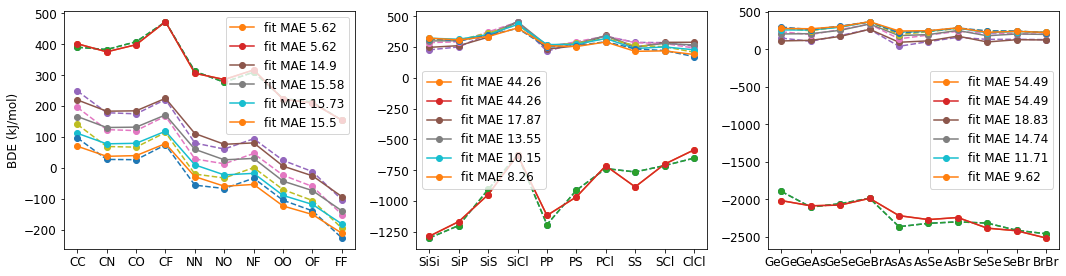

In [64]:
    
plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = [15,4]

fig, ax = plt.subplots(1,3)
mae_dist = {'r2':[], 'r3':[], 'r4':[]}
param = {'r2':[], 'r3':[], 'r4':[]}
for e, n, r in zip([ebfe_exp_142, ebfe_exp_175, ebfe_exp_200, ebfe_exp_212, ebfe_exp_225, ebfe_exp_236], [nbfe_142, nbfe_175, nbfe_200, nbfe_212, nbfe_225, nbfe_236], [ref_bde_142, ref_bde_175, ref_bde_200, ref_bde_212, ref_bde_225, ref_bde_236]):
    ebfe_exp_2 = e[:10]
    nbfe_2 = n[:10]
    ref_bde_2 = r[:10]
    out_2 = curve_fit(ebfe_fit, xdata_2, ebfe_exp_2)
    fit_2 = -(ebfe_fit(xdata_2, out_2[0][0], out_2[0][1], out_2[0][2]) + nbfe_2)
    r2_2 = get_r2(ebfe_fit(xdata_2, out_2[0][0], out_2[0][1], out_2[0][2]), ebfe_exp_2)
    mae_2 = np.abs(fit_2-ref_bde_2).mean()
    
    
    ebfe_exp_3 = e[10:20]
    nbfe_3 = n[10:20]
    ref_bde_3 = r[10:20]
    print(len(ref_bde_3))
    out_3 = curve_fit(ebfe_fit, xdata_3, ebfe_exp_3)
    fit_3 = -(ebfe_fit(xdata_3, out_3[0][0], out_3[0][1], out_3[0][2]) + nbfe_3)
    r2_3 = get_r2(ebfe_fit(xdata_3, out_3[0][0], out_3[0][1], out_3[0][2]), ebfe_exp_3)
    mae_3 = np.abs(fit_3-ref_bde_3).mean()
    
    ebfe_exp_4 = e[20:]
    nbfe_4 = n[20:]
    ref_bde_4 = r[20:]
    
    out_4 = curve_fit(ebfe_fit, xdata_4, ebfe_exp_4)
    fit_4 = -(ebfe_fit(xdata_4, out_4[0][0], out_4[0][1], out_4[0][2]) + nbfe_4)
    r2_4 = get_r2(ebfe_fit(xdata_4, out_4[0][0], out_4[0][1], out_4[0][2]), ebfe_exp_4)
    mae_4 = np.abs(fit_4-ref_bde_4).mean()
    
    mae_dist['r2'].append(mae_2)
    mae_dist['r3'].append(mae_3)
    mae_dist['r4'].append(mae_4)
    param['r2'].append(out_2)
    param['r3'].append(out_3)
    param['r4'].append(out_4)
    
    ax[0].plot(comps_2, ref_bde_2, '--o')
    # ax[0].plot(comps_2, fit_2, '-o', label = f'fit MAE {np.round(mae_2,2)}\n$r^2$ = {np.round(r2_2,8)}')
    ax[0].plot(comps_2, fit_2, '-o', label = f'fit MAE {np.round(mae_2,2)}')
    ax[0].legend()


    ax[1].plot(comps_3, ref_bde_3, '--o')
    ax[1].plot(comps_3, fit_3, '-o', label = f'fit MAE {np.round(mae_3,2)}')
    # ax[1].plot(comps_3, fit_3, '-o', label = f'fit MAE {np.round(mae_3,2)}\n$r^2$ = {np.round(r2_3,8)}')
    ax[1].legend()

    ax[2].plot(comps_4, ref_bde_4, '--o')
    ax[2].plot(comps_4, fit_4, '-o', label = f'fit MAE {np.round(mae_4,2)}')
# ax[2].plot(comps_4, fit_4, '-o', label = f'fit MAE {np.round(mae_4,2)}\n$r^2$ = {np.round(r2_4,8)}')
ax[2].legend()

ax[0].set_ylabel('BDE (kJ/mol)')
plt.tight_layout()



# out_a4 = curve_fit(ebfe_fit_aprime, xdata_4, ebfe_exp_4)
# fit_4a = -(ebfe_fit_aprime(xdata_4, out_a4[0][0], out_a4[0][1], out_a4[0][2], out_a4[0][3]) + nbfe_4)
# # r2_4 = get_r2(ebfe_fit(xdata_4, out_4[0][0], out_4[0][1], out_4[0][2]), ebfe_exp_4)
# mae_4a = np.abs(fit_4a-ref_bde_4).mean()

In [67]:
param['r2'][0]

(array([  16.49899279, -440.11413745, -462.81894411]),
 array([[ 0.54739987, -3.93545945,  0.62145834],
        [-3.93545945, 59.66032792, -4.99491826],
        [ 0.62145834, -4.99491826,  0.71486417]]))

In [68]:
param['r3'][3]

(array([  13.02527596, -823.70979886, -305.36184899]),
 array([[ 2.11996964e+00, -1.00454601e+02,  3.07918428e+00],
        [-1.00454601e+02,  5.57141993e+03, -1.49239042e+02],
        [ 3.07918428e+00, -1.49239042e+02,  4.48626613e+00]]))

In [69]:
param['r4'][-1]

(array([    6.79941932, -2315.23836791,  -278.57719584]),
 array([[ 7.24925415e-01, -2.16174308e+02,  1.36280061e+00],
        [-2.16174308e+02,  6.66108038e+04, -4.08297796e+02],
        [ 1.36280061e+00, -4.08297796e+02,  2.56365347e+00]]))

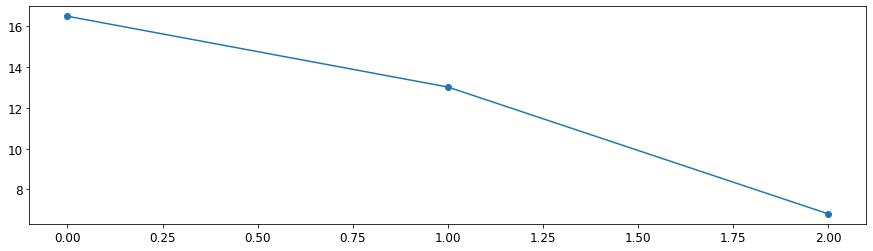

In [72]:
plt.plot([16.49899279, 13.02527596, 6.79941932 ] , '-o')

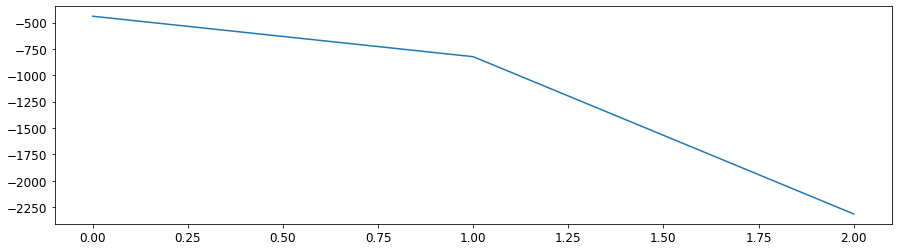

In [73]:
plt.plot([-440.11413745, -823.70979886,-2315.23836791 ])

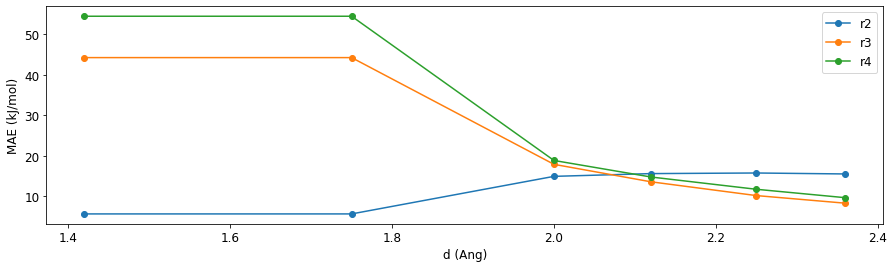

In [20]:
dist = [1.42, 1.75, 2, 2.12, 2.25, 2.36]
for k in mae_dist:
    plt.plot(dist, mae_dist[k], '-o', label = k)
    
plt.ylabel('MAE (kJ/mol)')
plt.xlabel('d (Ang)')
plt.legend()

In [ ]:
plt.plot(ref_bde_4)
plt.plot(fit_4a)

In [ ]:
frag_types_2 = ['C', 'N', 'O', 'F']
comps_2 = []
for i in range(len(frag_types_2)):
    for j in range(i, len(frag_types_2)):
        comps_2.append(frag_types_2[i]+ frag_types_2[j])

frag_types_3 = ['Si', 'P', 'S', 'Cl']
comps_3 = []
for i in range(len(frag_types_3)):
    for j in range(i, len(frag_types_3)):
        comps_3.append(frag_types_3[i]+ frag_types_3[j])

frag_types_4 = ['Ge', 'As', 'Se', 'Br']
comps_4 = []
for i in range(len(frag_types_4)):
    for j in range(i, len(frag_types_4)):
        comps_4.append(frag_types_4[i]+ frag_types_4[j])

In [ ]:
plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = [15,4]

fig, ax = plt.subplots(1,3)

ax[0].plot(comps_2, ref_bde_2, '-o', label = 'ref')
# ax[0].plot(comps_2, fit_2, '-o', label = f'fit MAE {np.round(mae_2,2)}\n$r^2$ = {np.round(r2_2,8)}')
ax[0].plot(comps_2, fit_2, '-o', label = f'fit MAE {np.round(mae_2,2)}')
ax[0].legend()


ax[1].plot(comps_3, ref_bde_3, '-o', label = 'ref')
ax[1].plot(comps_3, fit_3, '-o', label = f'fit MAE {np.round(mae_3,2)}')
# ax[1].plot(comps_3, fit_3, '-o', label = f'fit MAE {np.round(mae_3,2)}\n$r^2$ = {np.round(r2_3,8)}')
ax[1].legend()

ax[2].plot(comps_4, ref_bde_4, '-o', label = 'ref')
ax[2].plot(comps_4, fit_4, '-o', label = f'fit MAE {np.round(mae_4,2)}')
# ax[2].plot(comps_4, fit_4, '-o', label = f'fit MAE {np.round(mae_4,2)}\n$r^2$ = {np.round(r2_4,8)}')
ax[2].legend()

ax[0].set_ylabel('BDE (kJ/mol)')
plt.tight_layout()

In [ ]:
energies_all = np.concatenate((energies_2, energies_3, energies_4), axis =0 )
ebfe_exp_all = energies_all[:,1]*2600
nbfe_all = energies_all[:,2]*2600
ref_bde_all = -energies_all[:,0]*2600

xdata_all = np.concatenate((xdata_2, xdata_3, xdata_4), axis = 0)

In [ ]:
xdata_all = np.concatenate((xdata_2, xdata_3, xdata_4), axis = 0)
mae_all = []
for e, n, r in zip([ebfe_exp_142, ebfe_exp_175, ebfe_exp_2, ebfe_exp_212, ebfe_exp_225, ebfe_exp_236], [nbfe_142, nbfe_175, nbfe_2, nbfe_212, nbfe_225, nbfe_236], [ref_bde_142, ref_bde_175, ref_bde_2, ref_bde_212, ref_bde_225, ref_bde_236]):

    out_all = curve_fit(ebfe_fit, xdata_all, e)
    fit_all = -(ebfe_fit(xdata_all, out_all[0][0], out_all[0][1], out_all[0][2]) + n)
    mae_all.append(np.abs(fit_all-r).mean())
#     print(mae_all)
# plt.plot(ref_bde_142)
plt.plot(fit_all)

mae_all

In [ ]:
ref_bde_236

In [ ]:
plt.plot([1.42, 1.75, 2, 2.12, 2.25, 2.36], mae_all, '-o')

In [ ]:
out_all = curve_fit(ebfe_fit, xdata_all, ebfe_exp_all)
fit_all = -(ebfe_fit(xdata_all, out_all[0][0], out_all[0][1], out_all[0][2]) + nbfe_all)
mae_all = np.abs(fit_all-ref_bde_all).mean()

plt.plot(ref_bde_all)
plt.plot(fit_all)

In [ ]:
mae_all

In [ ]:
plt.plot(ebfe_exp_all, '-o')
plt.plot(ebfe_fit(xdata_all, out_all[0][0], out_all[0][1], out_all[0][2]), '-o')

In [ ]:
# mean distance between heavy atoms
# needed for nuclear repulsion calculation
import glob
from ase.units import Bohr
import ase.io as aio

system = 'diatomics'
bond_type = 'single'

structures = []
for row in ['row_2', 'row_3', 'row_4']:
    structures.extend(glob.glob(f'/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/{row}/{system}_{bond_type}/*_opt.xyz'))
dist = []
for s in structures:
    mol = aio.read(s)
    dist.append(mol.get_distance(0, 1))
dist = np.array(dist)
mean_dist = dist.mean()/Bohr

e_nuc = []
for x in xdata_all:
    e_nuc.append(x[0]*x[1]/mean_dist)
e_nuc = np.array(e_nuc)

In [ ]:
mean_dist*Bohr

In [ ]:
bfe = energies_all[:,0].copy()

ebfe_adjusted = (bfe-e_nuc)*2600
nbfe_adjusted = e_nuc*2600
ref_bde_adjusted = -bfe*2600

In [ ]:
fig, ax = plt.subplots(1,3)
ax[0].plot(ref_bde_all)
ax[0].plot(ref_bde_adjusted)

ax[1].plot(ebfe_exp_all)
ax[1].plot(ebfe_adjusted)

ax[2].plot(nbfe_all)
ax[2].plot(nbfe_adjusted)

In [ ]:
out_all = curve_fit(ebfe_fit, xdata_all, ebfe_adjusted)
fit_all = -(ebfe_fit(xdata_all, out_all[0][0], out_all[0][1], out_all[0][2]) + nbfe_adjusted)
mae_all = np.abs(fit_all-ref_bde_adjusted).mean()

comps_all = comps_2.copy()
comps_all.extend(comps_3)
comps_all.extend(comps_4)
plt.rcParams['figure.figsize'] = [20,6]
plt.plot(comps_all, ref_bde_adjusted, label = 'ref')
plt.plot(comps_all, fit_all, '-o', label = f'fit MAE = {np.round(mae_all, 2)}')
plt.ylabel('BDE (kJ/mol)')
plt.legend()

In [ ]:
n = 10
plt.plot(ebfe_adjusted[:n])
plt.plot(ebfe_fit(xdata_all, out_all[0][0], out_all[0][1], out_all[0][2])[:n])



In [ ]:
beta = []
alpha = []
b_prime = []
for i in [out_2, out_3, out_4]:
    beta.append(i[0][0])
    alpha.append(i[0][1])
    b_prime.append(i[0][2])

In [ ]:
plt.plot(b_prime, '-o')

In [ ]:
ebfe_fit(xdata_all, out_all[0][0], out_all[0][1], out_all[0][2])[:n]-ebfe_adjusted[:n]

In [ ]:
out_all_gamma = curve_fit(ebfe_fit_gamma, xdata_all, ebfe_adjusted)

fit_all_gamma = -(ebfe_fit_gamma(xdata_all, out_all_gamma[0][0], out_all_gamma[0][1], out_all_gamma[0][2], out_all_gamma[0][3]) + nbfe_adjusted)
mae_all_gamma = np.abs(fit_all_gamma-ref_bde_adjusted).mean()

In [ ]:
out_all_gamma

In [ ]:
comps_all = comps_2.copy()
comps_all.extend(comps_3)
comps_all.extend(comps_4)
plt.rcParams['figure.figsize'] = [20,6]
plt.plot(ref_bde_adjusted, label = 'ref')

plt.plot(comps_all, fit_all, '-o', label = f'fit MAE = {np.round(mae_all, 2)}')


plt.plot(fit_all_gamma, '-o', label = f'fit2 MAE = {np.round(mae_all_gamma, 2)}')
plt.legend()
plt.ylabel('BDE (kJ/mol)')


In [ ]:
mae_all_gamma

In [ ]:
p0 = [36.66033465, -146.85897595, 2.00090536, -330.96945723, 1.0]
out_all_cprime = curve_fit(ebfe_fit_cprime, xdata_all, ebfe_adjusted, p0=p0)

fit_all_cprime = -(ebfe_fit_cprime(xdata_all, out_all_cprime[0][0], out_all_cprime[0][1], out_all_cprime[0][2], out_all_cprime[0][3], out_all_cprime[0][4]) + nbfe_adjusted)
mae_all_cprime = np.abs(fit_all_cprime-ref_bde_adjusted).mean()

In [ ]:
out_all_gamma[0]

In [ ]:
out_all_cprime[0]

In [ ]:
plt.plot(ref_bde_adjusted)
plt.plot(fit_all_cprime, '-o')

In [ ]:
ve = [4, 5, 6, 7]
ve_pairs = []
for i in range(len(ve)):
    for j in range(len(ve)):
        ve_pairs.append(f'{ve[i]}, {ve[j]}')

In [ ]:
ve_pairs

In [ ]:
def get_electronic_trends(energy):
    concat_en = np.concatenate((energy[:,1][[0, 1, 2, 3]],
        energy[:,1][[1, 4, 5, 6]],
        energy[:,1][[2, 5, 7, 8]],
        energy[:,1][[3, 6, 8, 9]]))
    return(concat_en)
plt.rcParams['font.size']=18
plt.plot(ve_pairs, get_electronic_trends(energies_2), '-o', label = 'row 2')
plt.plot(get_electronic_trends(energies_3), '-o', label = 'row 3')
plt.plot(get_electronic_trends(energies_4), '-o', label = 'row 4')
plt.xlabel(r'$N_{\rm{ve}, 1}, N_{\rm{ve}, 2}$')
plt.ylabel('EBFE (Ha)')
plt.legend()

In [ ]:
plt.plot(ref_bde_2, '-o', label = 'row 2')
plt.plot(ref_bde_3, '-o', label = 'row 3')
plt.plot(ref_bde_4, '-o', label = 'row 4')
plt.legend()

In [ ]:
fig, ax = plt.subplots(1,3)
ax[0].plot([2,3,4], [out_2[0][0], out_3[0][0], out_4[0][0]], '-o')
ax[1].plot([2,3,4], [out_2[0][1], out_3[0][1], out_4[0][1]], '-o')
ax[2].plot([2,3,4], [out_2[0][2], out_3[0][2], out_4[0][2]], '-o')
fig.tight_layout()

In [ ]:
out_4[0][0]

In [ ]:
out_2[0][1]

In [ ]:
out_3[0][1]

In [ ]:
out_4[0][1]

In [ ]:
out_2[0][2]

In [ ]:
out_3[0][2]

In [ ]:
out_4[0][2]

In [ ]:
P2H4 = -685.169956, b3lyp/cc-pVTZ

In [25]:
import glob
import ase.io as aio

In [59]:
row = 'row_4'
system = 'diatomics'
bond_type = 'single'

distances = dict()
rows = ['row_2', 'row_3', 'row_4']
for row in rows:

    structures = glob.glob(f'/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/{row}/{system}_{bond_type}/*_opt.xyz')
    from ase.units import Bohr
    dist = []
    for s in structures:
        mol = aio.read(s)
        dist.append(mol.get_distance(0, 1))
    dist = np.array(dist)
    mean_dist = dist.mean()
    
    distances[row] = dist

homo2 = [1.518780, 1.437014, 1.453213, 1.375981]
homo3 = [2.137693, 2.227767, 1.982484, 2.062116]
homo4 = [2.421583, 2.381642, 2.346513, 2.357309]
homos = [homo2, homo3, homo4]
for k,h  in zip(distances.keys(), homos):
    tmp = distances[k]
    distances[k] = [tmp, h]

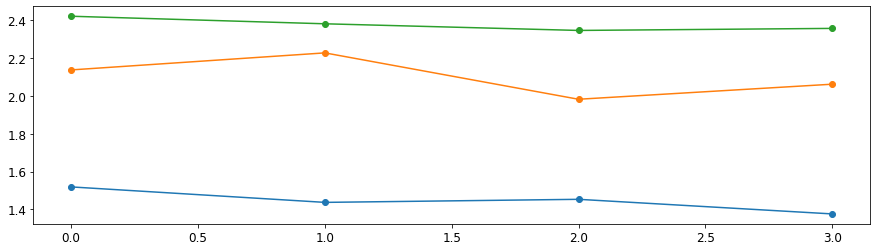

In [61]:
for h in [homo2, homo3, homo4]:
    plt.plot(h, '-o')

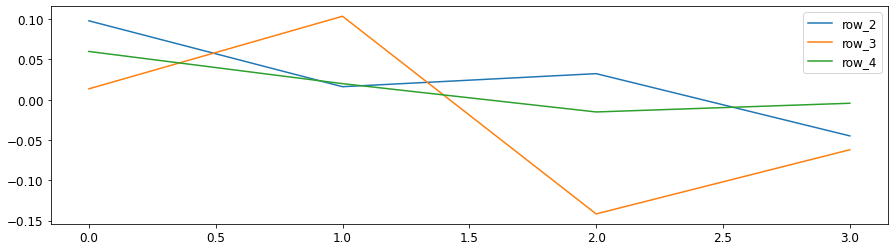

In [62]:
for k in distances.keys():
    plt.plot(distances[k][1]-distances[k][0].mean(), label = k)
plt.legend()

In [63]:
distances[k][0].mean()

2.3617545069795707

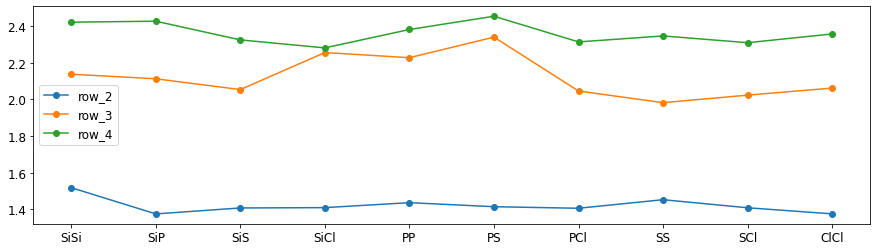

In [34]:
for k in distances.keys():
    plt.plot(comps_3, distances[k], '-o',label = k)
plt.legend()

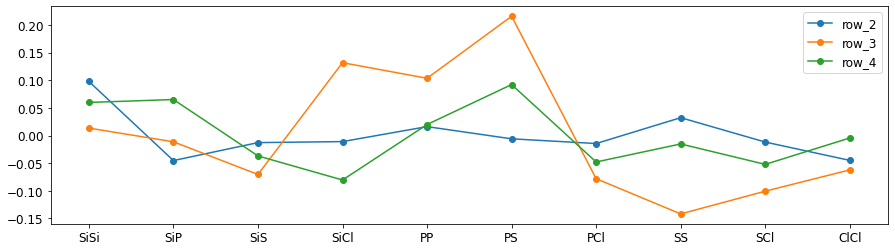

In [35]:
for k in distances.keys():
    plt.plot(comps_3, distances[k]-distances[k].mean(), '-o',label = k)
plt.legend()

In [46]:
import pandas as pd

df2 = pd.DataFrame({'comps':comps_2, 'd0':distances['row_2']})
df3 = pd.DataFrame({'comps':comps_3, 'd0':distances['row_3']})
df4 = pd.DataFrame({'comps':comps_4, 'd0':distances['row_4']})

df = pd.concat((df2,df3,df4))

df.to_csv(f'/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/d0.csv')